# **TikTok Project**

The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample


# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset into dataframe
data = pd.read_csv("TikTokDataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.


The purposes of EDA before constructing a logistic regression model:
1) to identify data anomalies such as outliers and class imbalance that might affect the modeling;
2) to verify model assumptions such as no severe multicollinearity.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()


,s_no,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape


(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes


s_no                          int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   s_no                      19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe(include='all')


,s_no,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isna().sum(axis=0)

s_no                          0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna()

In [10]:
# Display first few rows after handling missing values
data.head()

,s_no,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().any()

False

Check for and handle outliers.

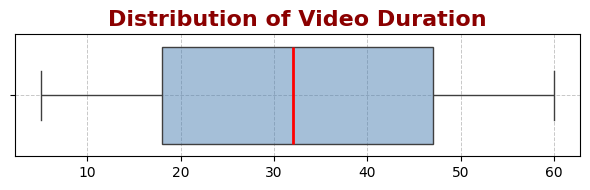

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6, 2))  # width=10, height=6 in inches
sns.boxplot(data=data, x="video_duration_sec", flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Distribution of Video Duration", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

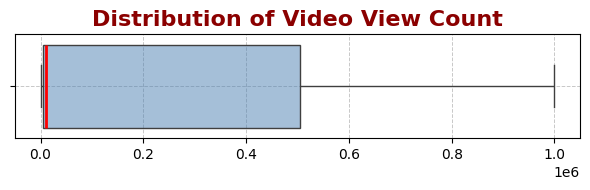

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
feature = 'video_view_count'

plt.figure(figsize=(6, 2))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()



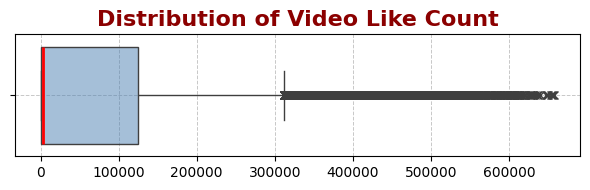

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
feature = 'video_like_count'

plt.figure(figsize=(6, 2))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()



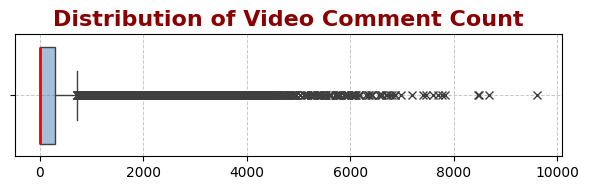

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
feature = 'video_comment_count'

plt.figure(figsize=(6, 2))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()



In [16]:
# Check for and handle outliers for video_like_count
# Impute outliers with 1.5*IQR range
q1 = data["video_like_count"].quantile(0.25)
q3 = data["video_like_count"].quantile(0.75)

iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [17]:
# Check for and handle outliers for video_comment_count
# Impute outliers with 1.5*IQR range
q1 = data["video_comment_count"].quantile(0.25)
q3 = data["video_comment_count"].quantile(0.75)

iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

Check class balance.

In [18]:
# Check class balance for video_comment_count
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [19]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
minority = data[data['verified_status']=='verified']
majority = data[data['verified_status']=='not verified']

# Upsample the minority class (which is "verified")
temp = resample(minority,
                replace=True,                 # to sample with replacement
                n_samples=len(majority), random_state=0) # to match majority class

# Combine majority class with upsampled minority class
df_upsamp = pd.concat([majority, temp],ignore_index=True)

# Display new class counts
df_upsamp['verified_status'].value_counts(' ')

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [20]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
# data_upsamp.head()
df_upsamp.groupby(['claim_status','verified_status'])[["video_transcription_text"]].agg(func=lambda x: np.mean([len(text) for text in x]))

video_transcription_text
claim_status verified_status                          
claim        not verified                    95.388446
             verified                        94.629510
opinion      not verified                    82.768886
             verified                        82.456834

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [21]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df_upsamp['video_transcription_text_length'] = df_upsamp['video_transcription_text'].apply(func = lambda x:len(x))

In [22]:
# Display first few rows of dataframe after adding new column
df_upsamp.head()

,s_no,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

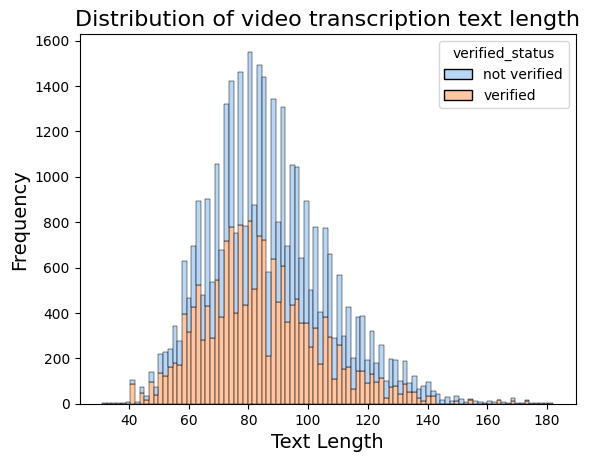

In [23]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot

sns.histplot(data=df_upsamp, x='video_transcription_text_length', hue='verified_status', multiple='stack', kde=False, palette="pastel", legend=True, element="bars", stat='count')

# Add labels and title
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of video transcription text length', fontsize=16)

# Show the plot
plt.show()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [24]:
# Code a correlation matrix to help determine most correlated variables
df_upsamp.corr(numeric_only=True)

,s_no,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
s_no,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
video_transcription_text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Visualize a correlation heatmap of the data.

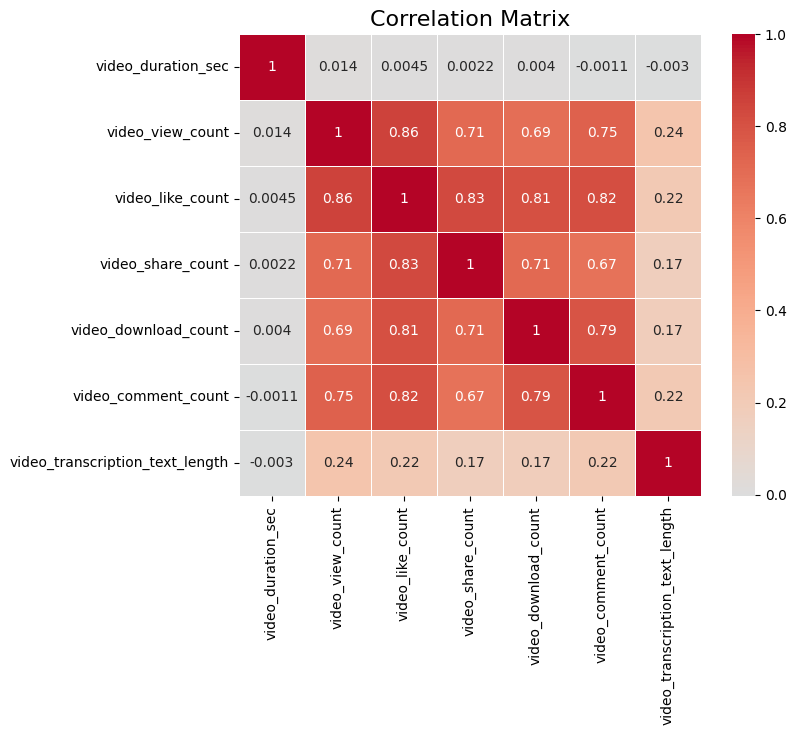

In [25]:
# Create a heatmap to visualize how correlated variables are
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_upsamp[['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count','video_transcription_text_length']].corr(), annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5)

# Add a title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()


One of the model assumptions for logistic regression is no severe multicollinearity among the features.
Variable that have high correlation
* video like count and video view count
* video share count and video like count
* video download count and video like count
* video comment count and video like count
* video comment count and video download count

So out of these video like is frequently occuring, so we can exclude that from out model.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [26]:
# Select outcome variable
Y = df_upsamp['verified_status']
df_upsamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   s_no                             35768 non-null  int64  
 1   claim_status                     35768 non-null  object 
 2   video_id                         35768 non-null  int64  
 3   video_duration_sec               35768 non-null  int64  
 4   video_transcription_text         35768 non-null  object 
 5   verified_status                  35768 non-null  object 
 6   author_ban_status                35768 non-null  object 
 7   video_view_count                 35768 non-null  float64
 8   video_like_count                 35768 non-null  float64
 9   video_share_count                35768 non-null  float64
 10  video_download_count             35768 non-null  float64
 11  video_comment_count              35768 non-null  float64
 12  video_transcriptio

Select the features.

In [128]:
# Select features
X = df_upsamp[['video_duration_sec','claim_status','author_ban_status','video_view_count','video_share_count','video_comment_count','video_download_count','video_transcription_text_length']]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_comment_count,video_download_count,video_transcription_text_length
0,59,claim,under review,343296.0,241.0,0.0,1.0,97
1,32,claim,active,140877.0,19034.0,684.0,1161.0,107
2,31,claim,active,902185.0,2858.0,329.0,833.0,137
3,25,claim,active,437506.0,34812.0,584.0,1234.0,131
4,19,claim,active,56167.0,4110.0,152.0,547.0,128


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [129]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [130]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((26826, 8), (8942, 8), (26826,), (8942,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [131]:
# Check data types
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   video_duration_sec               35768 non-null  int64  
 1   claim_status                     35768 non-null  object 
 2   author_ban_status                35768 non-null  object 
 3   video_view_count                 35768 non-null  float64
 4   video_share_count                35768 non-null  float64
 5   video_comment_count              35768 non-null  float64
 6   video_download_count             35768 non-null  float64
 7   video_transcription_text_length  35768 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 2.2+ MB


In [132]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()



array(['opinion', 'claim'], dtype=object)

In [133]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()


array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [134]:
# Select the training features that needs to be encoded
to_encode_data = X_train[['claim_status','author_ban_status']]

# Display first few rows
to_encode_data.head()


,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [135]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [136]:
# Fit and transform the training features using the encoder
encoded_data = X_encoder.fit_transform(to_encode_data)

In [137]:
# Get feature names from encoder
X_encoder.get_feature_names_out()


array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [138]:
# Display first few rows of encoded training features
encoded_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [139]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=encoded_data, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [140]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns = ['claim_status','author_ban_status']).head()
X_train.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_comment_count,video_download_count,video_transcription_text_length
33058,33,opinion,active,2252.0,23.0,0.0,4.0,71
20491,52,opinion,active,6664.0,550.0,2.0,53.0,109
25583,37,opinion,active,6327.0,257.0,0.0,3.0,99
18474,57,opinion,active,1702.0,28.0,0.0,0.0,80
27312,21,opinion,active,3842.0,101.0,0.0,1.0,66


In [141]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# concat works by matching indices
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns = ['claim_status','author_ban_status']).reset_index(drop=True),X_train_encoded_df],axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_view_count,video_share_count,video_comment_count,video_download_count,video_transcription_text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,0.0,4.0,71,1.0,0.0,0.0
1,52,6664.0,550.0,2.0,53.0,109,1.0,0.0,0.0
2,37,6327.0,257.0,0.0,3.0,99,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,80,1.0,0.0,0.0
4,21,3842.0,101.0,0.0,1.0,66,1.0,0.0,0.0


Check the data type of the outcome variable.

In [142]:
# Check data type of outcome variable
y_train.dtype


dtype('O')

In [143]:
# Get unique values of outcome variable
y_train.unique()


array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [144]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [145]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array and
# the current shape is (2586,) so make it as (2586,1)
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Display the encoded training outcome variable
y_train_final


array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [146]:
# Construct a logistic regression model and fit it to the training set
clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)



<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [147]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [148]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [149]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(X_test_encoded,columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [150]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=['author_ban_status','claim_status'], axis=1).head()


,video_duration_sec,video_view_count,video_share_count,video_comment_count,video_download_count,video_transcription_text_length
21061,41,2118.0,57.0,2.0,5.0,50
31748,27,5701.0,157.0,0.0,1.0,78
20197,31,449767.0,75385.0,728.5,5956.0,127
5727,19,792813.0,56597.0,728.5,5146.0,105
11607,54,2044.0,68.0,2.0,19.0,51


In [151]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=['author_ban_status','claim_status'], axis=1).reset_index(drop=True),X_test_encoded_df],axis=1)


# Display first few rows
X_test_final.head()


,video_duration_sec,video_view_count,video_share_count,video_comment_count,video_download_count,video_transcription_text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,2.0,5.0,50,1.0,0.0,0.0
1,27,5701.0,157.0,0.0,1.0,78,1.0,0.0,0.0
2,31,449767.0,75385.0,728.5,5956.0,127,0.0,0.0,0.0
3,19,792813.0,56597.0,728.5,5146.0,105,0.0,0.0,0.0
4,54,2044.0,68.0,2.0,19.0,51,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [152]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = clf.predict(X_test_final)


Display the predictions on the encoded testing set.

In [153]:
# Display the predictions on the encoded testing set
y_pred


array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [154]:
# Display the true labels of the testing set
y_test


21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [155]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()


# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [156]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 9), (26826,), (8942, 9), (8942,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

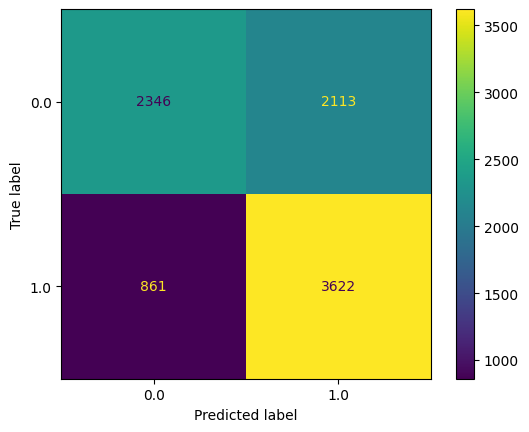

In [157]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test_final, y_pred, labels=clf.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [158]:
print(clf.classes_)
print(y_encoder.get_feature_names_out())

[0. 1.]
['x0_verified']


In [159]:
# Create a classification report
target_labels = ["not verified", "verified"]
print(classification_report(y_test_final, y_pred,target_names=target_labels))

              precision    recall  f1-score   support

not verified       0.73      0.53      0.61      4459
    verified       0.63      0.81      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.68      0.67      0.66      8942
weighted avg       0.68      0.67      0.66      8942



### **Task 4c. Interpret model coefficients**

In [160]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":clf.feature_names_in_, "Model Coefficient":clf.coef_[0]})


,Feature Name,Model Coefficient
0,video_duration_sec,-3.048447e-03
1,video_view_count,-2.888498e-07
2,video_share_count,4.921357e-06
3,video_comment_count,3.725265e-04
4,video_download_count,-7.490839e-05
5,video_transcription_text_length,-2.285803e-03
6,claim_status_opinion,1.544924e+00
7,author_ban_status_banned,-5.609996e-01
8,author_ban_status_under review,-3.222799e-01


### **Task 4d. Conclusion**

Key takeaways:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
    * Based on the logistic regression model, claim status and author ban status are important features
    * Each additional second of the video is associated with 0.003 decrease in the log-odds of the user having a verified status.
    * Each additional transcription text length is associated with 0.002 decrease in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 63% is less than ideal, but a recall of 81% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.


We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, claim status and author ban status are important features, where claim status is associated with increasing odds and author ban is associated with decreasing odds of being verified. Also, longer videos and higher transcirption text length tend to be associated with lower odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.